In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
import numpy as np

In [20]:
# Load the CSV file
df = pd.read_csv("/content/drive/MyDrive/lab5/adult_income.csv") # Replace with your CSV path
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
45218,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
45219,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
45220,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


 Show correlation matrix

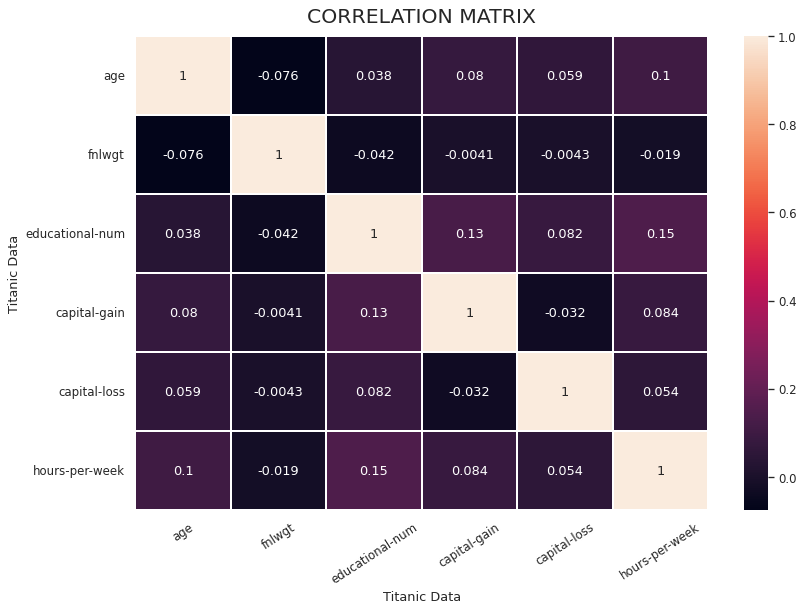

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats
#Correlation

correlation = df.corr(numeric_only=True)


plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Titanic Data')
plt.ylabel('Titanic Data')
plt.xticks(rotation=33)
plt.show()

Check for any missing (null) values in the dataset

In [22]:
df = pd.read_csv("/content/drive/MyDrive/lab5/adult_income.csv")
missing_values_count = df.isnull()
print(missing_values_count)

         age  workclass  fnlwgt  education  educational-num  marital-status  \
0      False      False   False      False            False           False   
1      False      False   False      False            False           False   
2      False      False   False      False            False           False   
3      False      False   False      False            False           False   
4      False      False   False      False            False           False   
...      ...        ...     ...        ...              ...             ...   
45217  False      False   False      False            False           False   
45218  False      False   False      False            False           False   
45219  False      False   False      False            False           False   
45220  False      False   False      False            False           False   
45221  False      False   False      False            False           False   

       occupation  relationship   race  gender  cap

 Handle the null value

In [23]:
#Here no missing value

Show the scatter plots

Top correlated numerical variable pairs:
educational-num  hours-per-week     0.146206
capital-gain     educational-num    0.126907
hours-per-week   age                0.101992
                 capital-gain       0.083880
capital-loss     educational-num    0.081711
dtype: float64


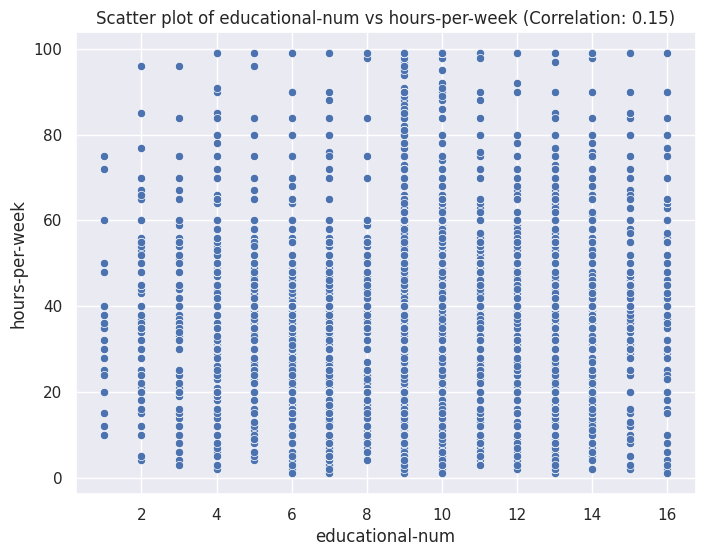

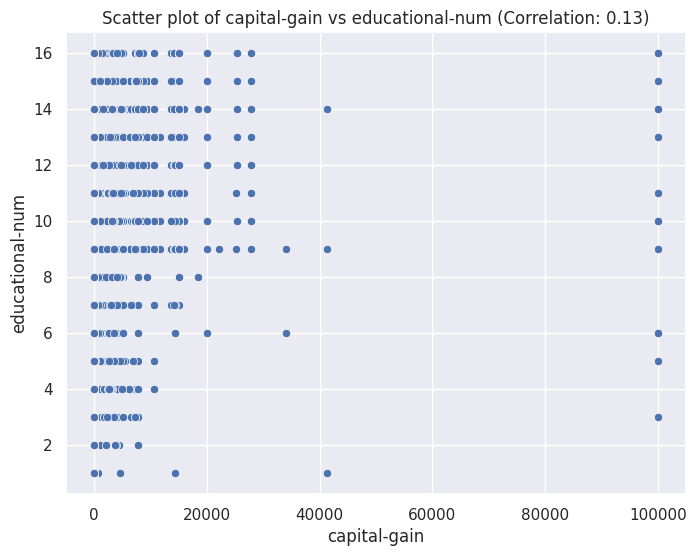

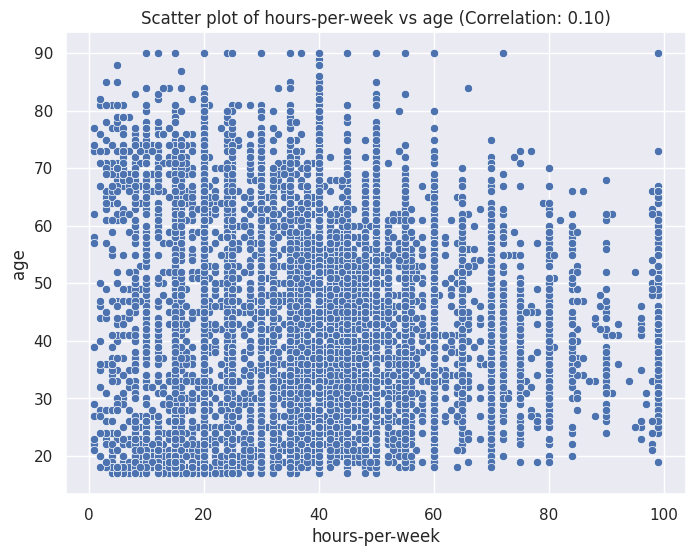

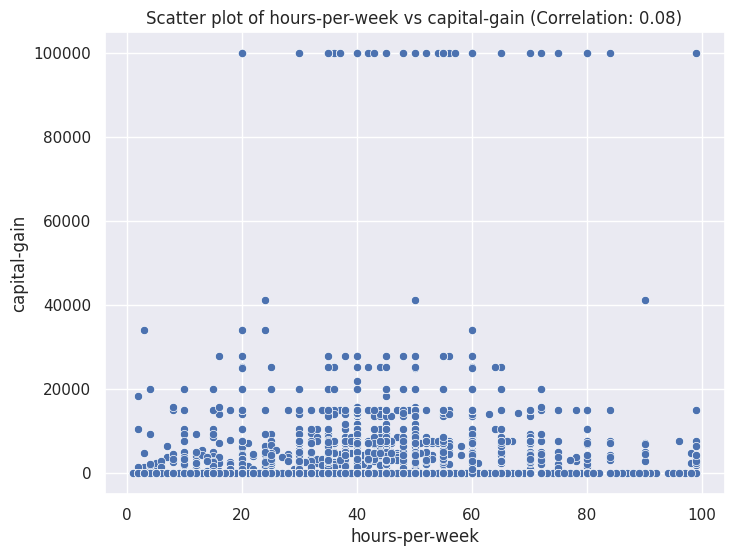

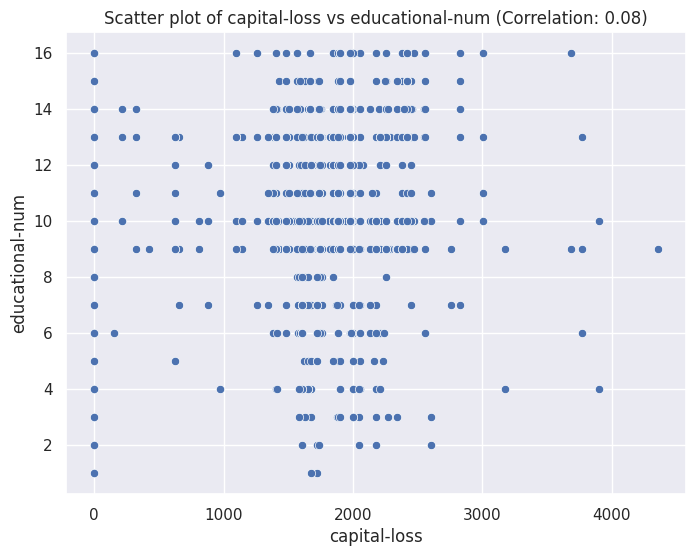

In [24]:
# Find the pairs of variables with the highest absolute correlation values
correlation_unstacked = correlation.unstack()
correlation_sorted = correlation_unstacked.sort_values(kind="quicksort", ascending=False)

# Select the top correlated pairs (excluding self-correlation)
top_correlated_pairs = correlation_sorted[correlation_sorted != 1.0].drop_duplicates()
top_pairs = top_correlated_pairs.head()

print("Top correlated numerical variable pairs:")
print(top_pairs)

# Generate scatter plots for the top correlated pairs
for (var1, var2), corr_value in top_pairs.items():
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=var1, y=var2)
    plt.title(f'Scatter plot of {var1} vs {var2} (Correlation: {corr_value:.2f})')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

Show the line plot

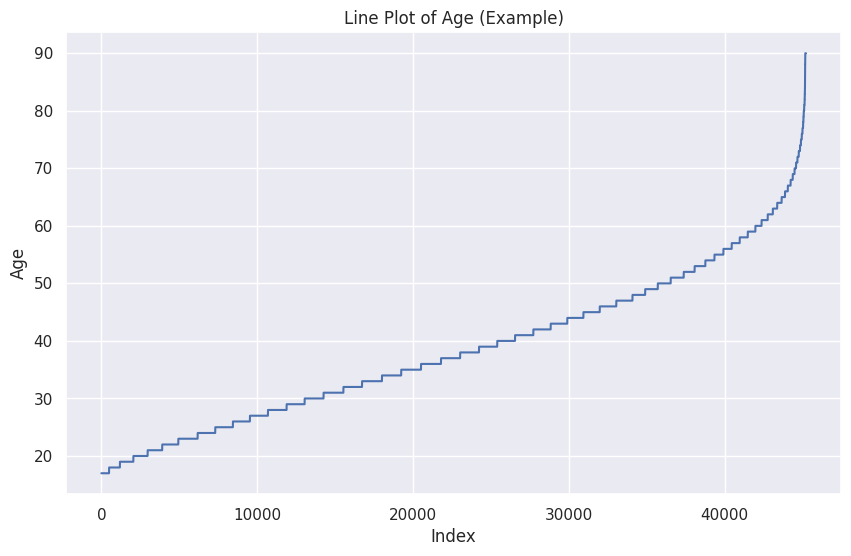

Note: A line plot may not be the most informative visualization for showing trends in age across the dataset index. Histograms or box plots are generally better for showing the distribution of a single numerical variable.


In [25]:
# Generate a line plot using the 'age' column as an example
plt.figure(figsize=(10, 6))
plt.plot(df['age'].sort_values().values) # Sort values to potentially see a trend if any
plt.xlabel('Index') # Line plots typically show a trend over an index or time
plt.ylabel('Age')
plt.title('Line Plot of Age (Example)')
plt.show()

print("Note: A line plot may not be the most informative visualization for showing trends in age across the dataset index. Histograms or box plots are generally better for showing the distribution of a single numerical variable.")

Show the bar plot

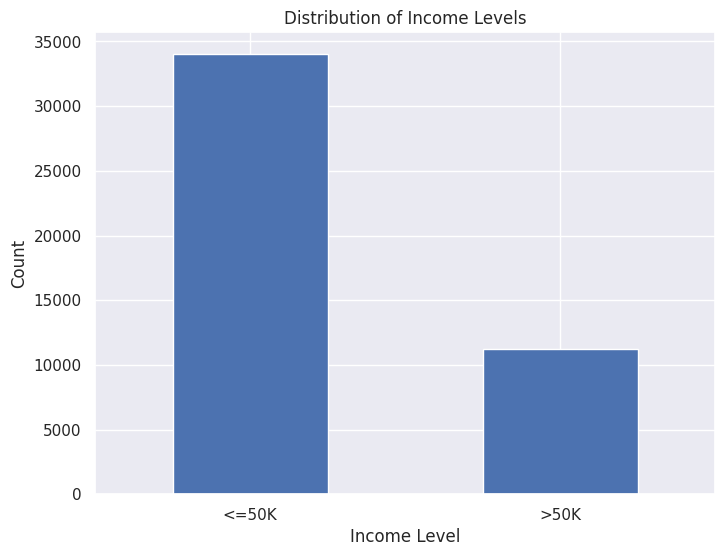

In [26]:
# Generate a bar plot for the 'income' column
plt.figure(figsize=(8, 6))
df['income'].value_counts().plot(kind='bar')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.title('Distribution of Income Levels')
plt.xticks(rotation=0)
plt.show()

Show the pie plot

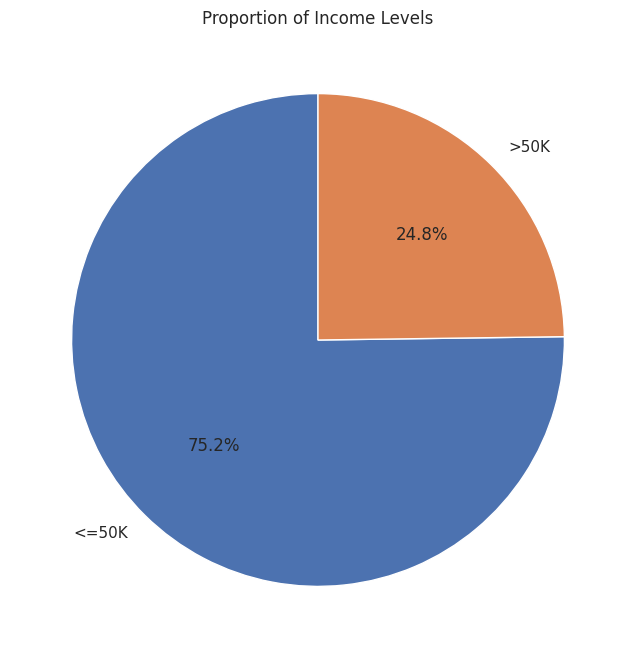

In [27]:
# Generate a pie plot for the 'income' column
plt.figure(figsize=(8, 8))
df['income'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Income Levels')
plt.ylabel('') # Remove the default y-label
plt.show()

Show the histogram

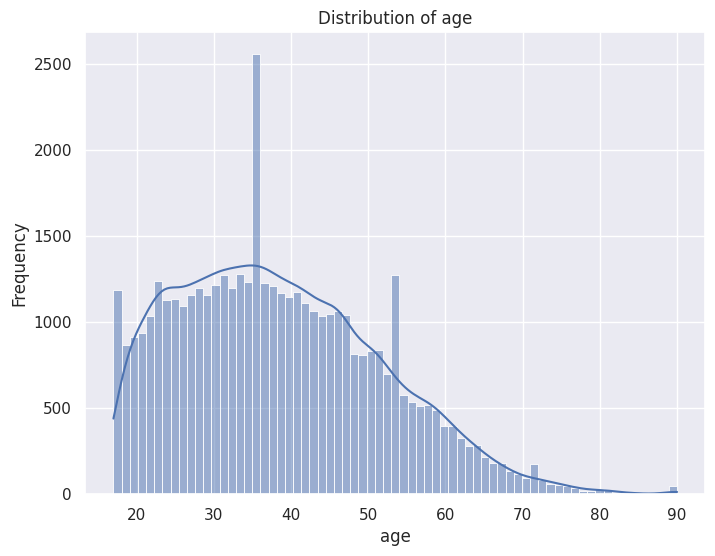

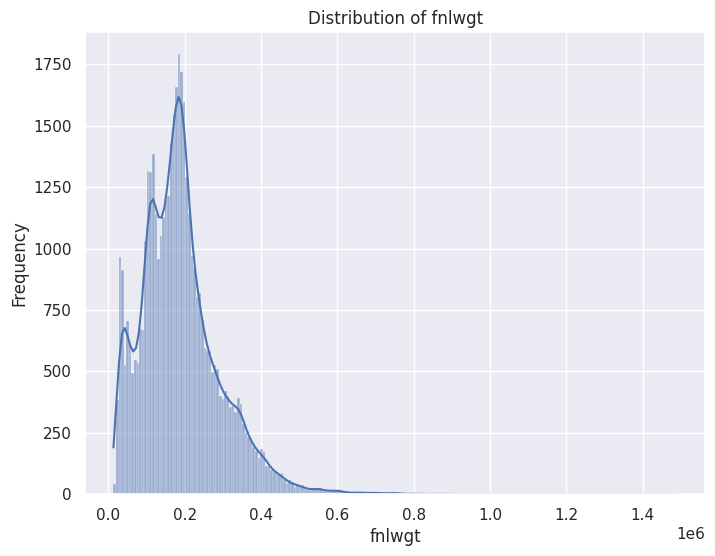

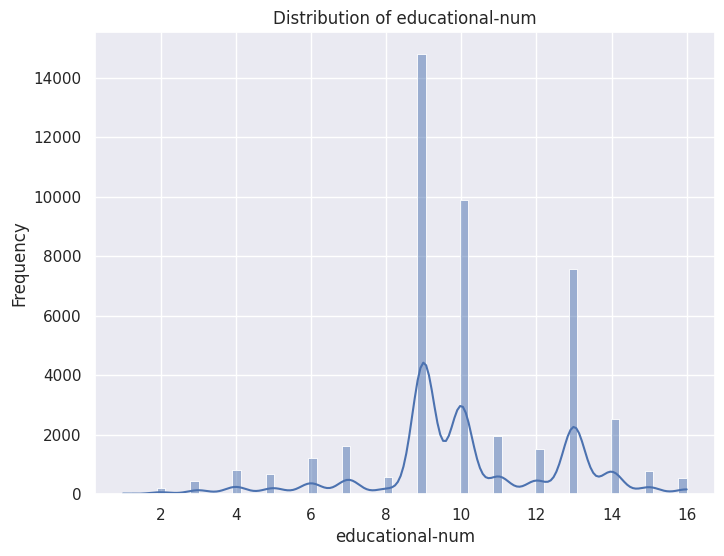

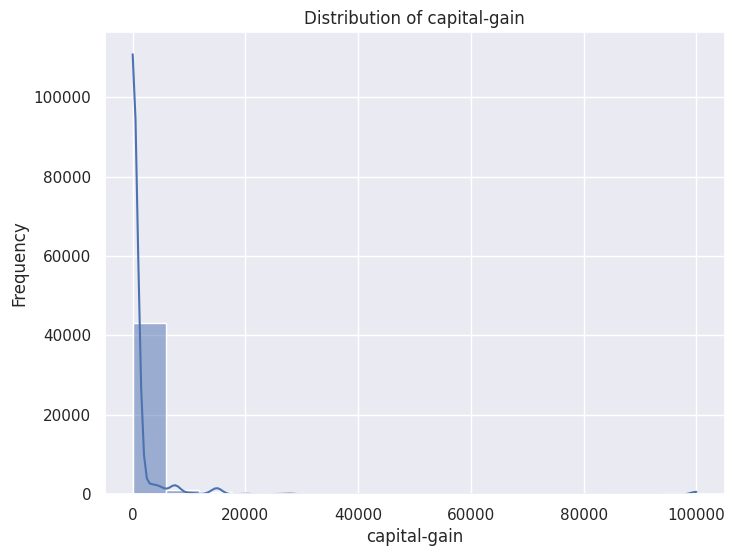

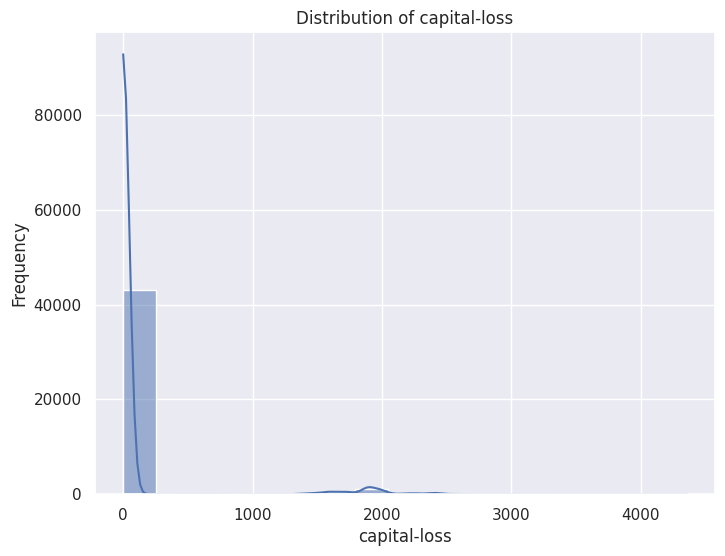

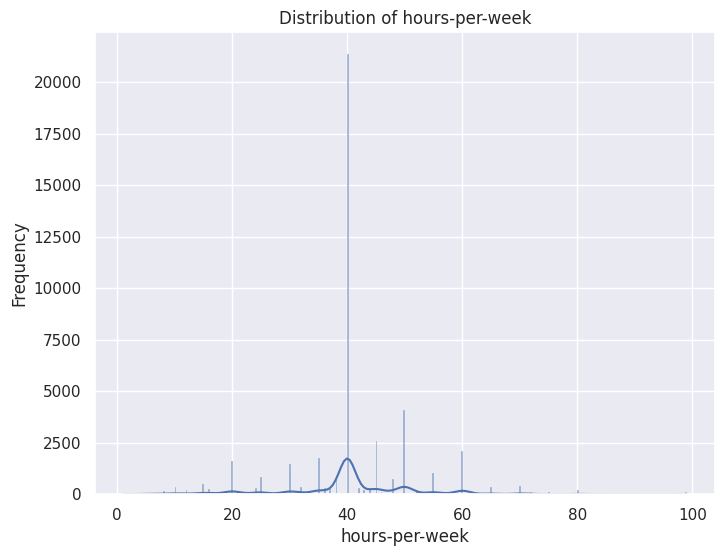

In [28]:
# Select only numerical columns for histograms
numerical_cols = df.select_dtypes(include=np.number).columns

# Generate histograms for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Boxplot

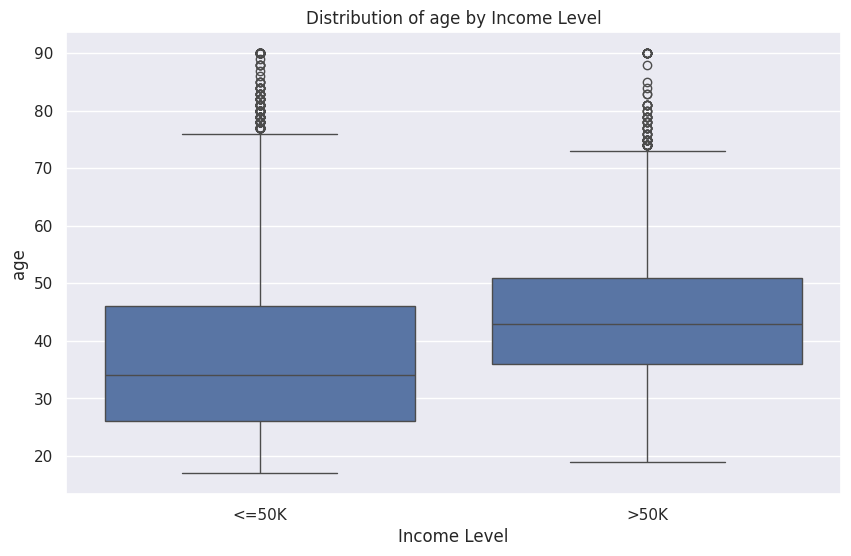

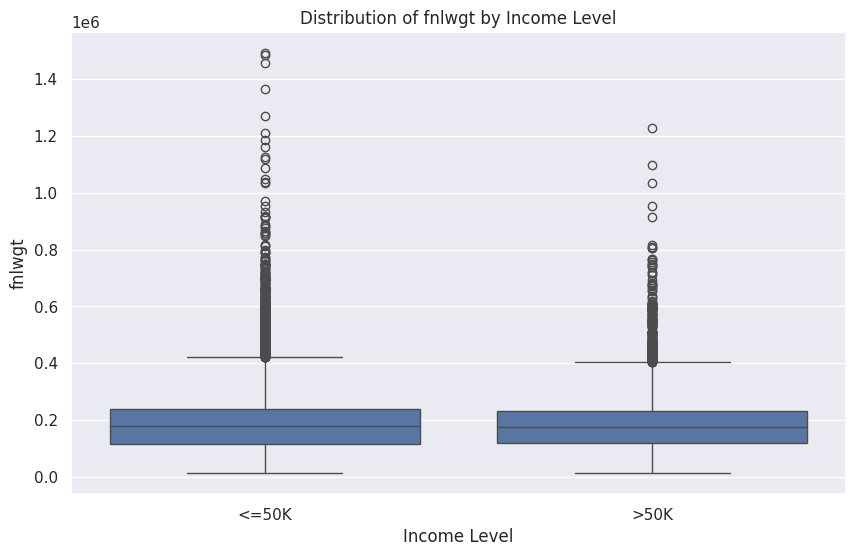

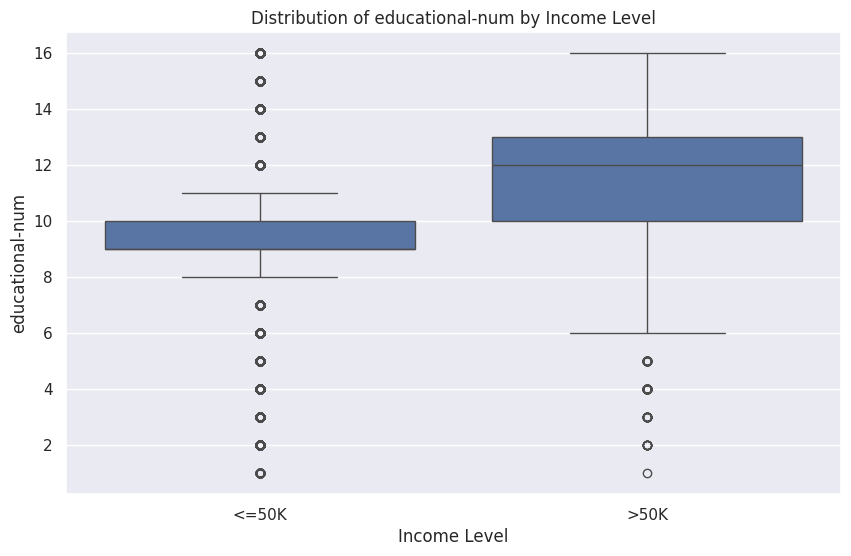

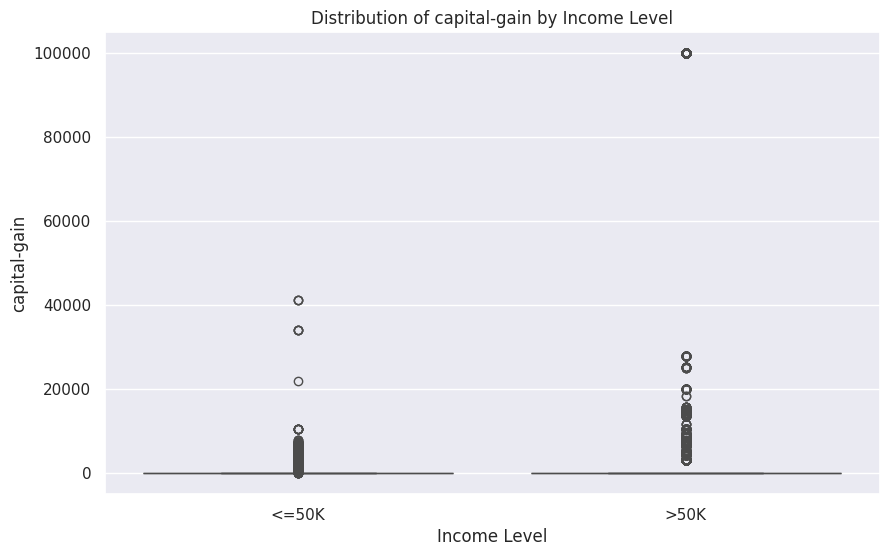

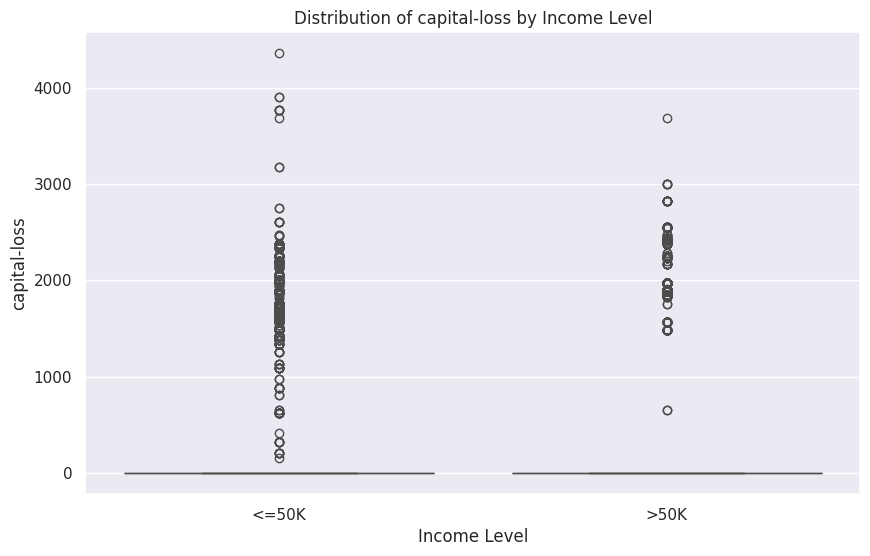

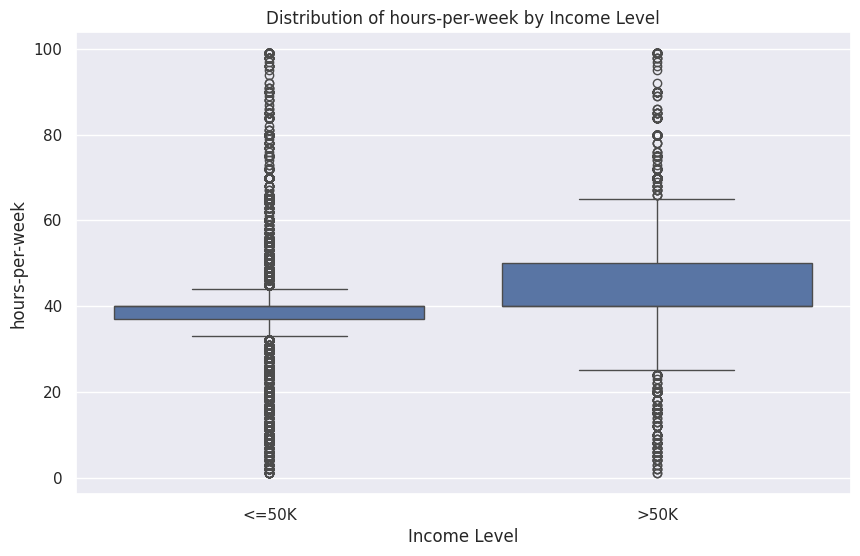

In [29]:
# Select only numerical columns for boxplots
numerical_cols = df.select_dtypes(include=np.number).columns

# Generate boxplots for each numerical column, grouped by income
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='income', y=col)
    plt.title(f'Distribution of {col} by Income Level')
    plt.xlabel('Income Level')
    plt.ylabel(col)
    plt.show()

Count plot


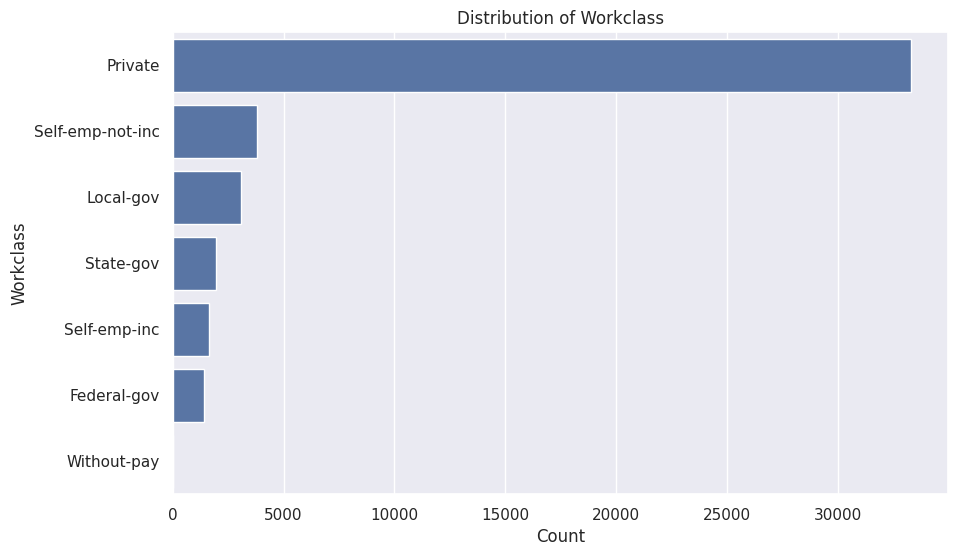

In [30]:
# Generate a count plot for the 'workclass' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='workclass', order = df['workclass'].value_counts().index) # Using y and order to make it more readable if there are many categories
plt.xlabel('Count')
plt.ylabel('Workclass')
plt.title('Distribution of Workclass')
plt.show()